# Proyecto

Housing Prices

In [43]:
## Importando todas las librerias que necesito

import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
from scipy import stats

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('train.csv')


In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Vamos a empezar a ver algunos básicos de nuestra información

In [4]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
data.shape

(1460, 81)

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


Ahora que ya tenemos nuestros básicos, empezaremos con la limpieza del dataset.

In [10]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
data.isnull()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False
1456,False,False,False,False,False,False,True,False,False,False,...,False,True,False,True,False,False,False,False,False,False
1457,False,False,False,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1458,False,False,False,False,False,False,True,False,False,False,...,False,True,True,True,False,False,False,False,False,False


In [12]:
valores_nulos = data.isnull().sum()

In [14]:
valores_nulos_eliminar = valores_nulos.loc[valores_nulos.gt(0)]/len(data)

In [15]:
valores_nulos_eliminar

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [25]:
valores_nulos_eliminar.median()

0.05547945205479452

In [27]:
columnas_fuera = list(valores_nulos_eliminar[valores_nulos_eliminar > valores_nulos_eliminar.median()].index)
columnas_fuera

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [33]:
data_2 = data.drop(columnas_fuera,axis=1).copy()

In [34]:
data_2

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Ahora se empezará a hacer el analisis de las ventas

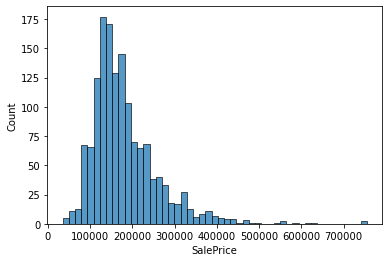

In [39]:
grafica_1 =sns.histplot(data['SalePrice'])
#grafica_1.set_xlabel('Precio de Venta')
#grafica_1.set_title('Distribución')

La concentración del precio de venta está entre los 100k y 200k

C:\Users\MICH\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\MICH\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


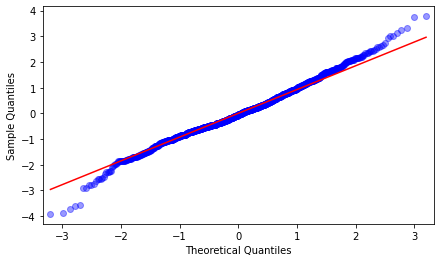

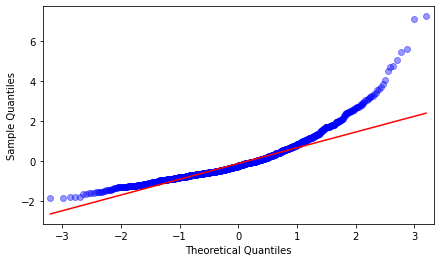

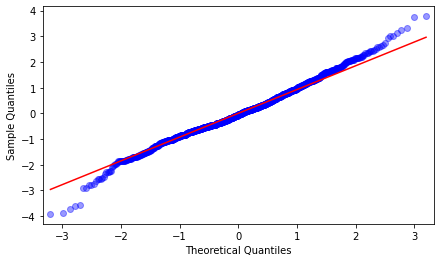

In [48]:
fig, grafica_2=plt.subplots(figsize=(7,4))
sm.qqplot(
    data_2['SalePrice'], fit = True, line = 'q', alpha = 0.4, lw = 2, ax = grafica_2)

fig, grafica_2=plt.subplots(figsize=(7,4))
sm.qqplot(
    np.log(data_2['SalePrice']), fit = True, line = 'q', alpha = 0.4, lw = 2, ax = grafica_2)

Como podemos observar la serie no se comporta de manera normal.

In [45]:
print('Kurtosis:', stats.kurtosis(data_2['SalePrice']))
print('Skewness:', stats.skew(data_2['SalePrice']))

Kurtosis: 6.509812011089439
Skewness: 1.880940746034036


In [50]:
print('Kurtosis:', stats.kurtosis(np.log(data_2['SalePrice'])))
print('Skewness:', stats.skew(np.log(data_2['SalePrice'])))

Kurtosis: 0.8026555069117713
Skewness: 0.1212103673013655


Dado el coeficiente de Kurtosis los valores están más centralizados que una variable normal. 

In [46]:
shapiro_test =stats.shapiro(data_2['SalePrice'])
shapiro_test

ShapiroResult(statistic=0.869671642780304, pvalue=3.206247534576162e-33)

In [51]:
shapiro_test =stats.shapiro(np.log(data_2['SalePrice']))
shapiro_test

ShapiroResult(statistic=0.9912067651748657, pvalue=1.1490678986092462e-07)

In [47]:
k2, p_value = stats.normaltest(data_2['SalePrice'])
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 610.8359109472653, p-value = 2.283848353787728e-133


In [52]:
k2, p_value = stats.normaltest(np.log(data_2['SalePrice']))
print(f"Estadístico = {k2}, p-value = {p_value}")

Estadístico = 25.507009834238303, p-value = 2.89216582205235e-06


Nuestra hipótesis nula es falsa dado los valores de p-value, se intento buscar normalizar los datos aplicandole una transformación logaritmica, se obtuvieron mejores resultados del p-value y como podemos ver en la prueba de normalidad de los cuantiles mejoro.

# Análisis estadístico

Para este tipo de analisis vamos a hacer una transformación de datos de caracteres a numericos

In [55]:
columnas_nuevas = [x for x in data_2 if x in data_2.select_dtypes(include=['int64','float64'])]
data_3 = data_2[columnas_nuevas]
data_3

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [56]:
scaler = StandardScaler()
data_4 = scaler.fit_transform(data_3)


In [57]:
df = pd.DataFrame(data_4, index=data_3.index, columns=data_3.columns)
df.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.730865,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.510015,0.575425,-0.288653,...,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,0.347273
1,-1.728492,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.572835,1.171992,-0.288653,...,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,0.007288
2,-1.726120,0.073375,0.073480,0.651479,-0.517200,0.984752,0.830215,0.322174,0.092907,-0.288653,...,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,0.536154
3,-1.723747,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.572835,-0.499274,-0.288653,...,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,-0.515281
4,-1.721374,0.073375,0.375148,1.374795,-0.517200,0.951632,0.733308,1.360826,0.463568,-0.288653,...,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,0.869843


Se decidio reemplazar los NAN con cero debido a que no necesariamente nos crean un sesgo en los datos porque tomamos los vectores con menos NAN en sus columnas

In [59]:

df=df.replace(np.nan,0)

In [60]:
pca = PCA(0.8)
pca.fit(df)

PCA(n_components=0.8)

In [61]:
print("Componentes = ", pca.n_components_ , ";\n Varianza explicada = ", round(pca.explained_variance_ratio_.sum(),5))

Componentes =  18 ;
 Varianza explicada =  0.8141


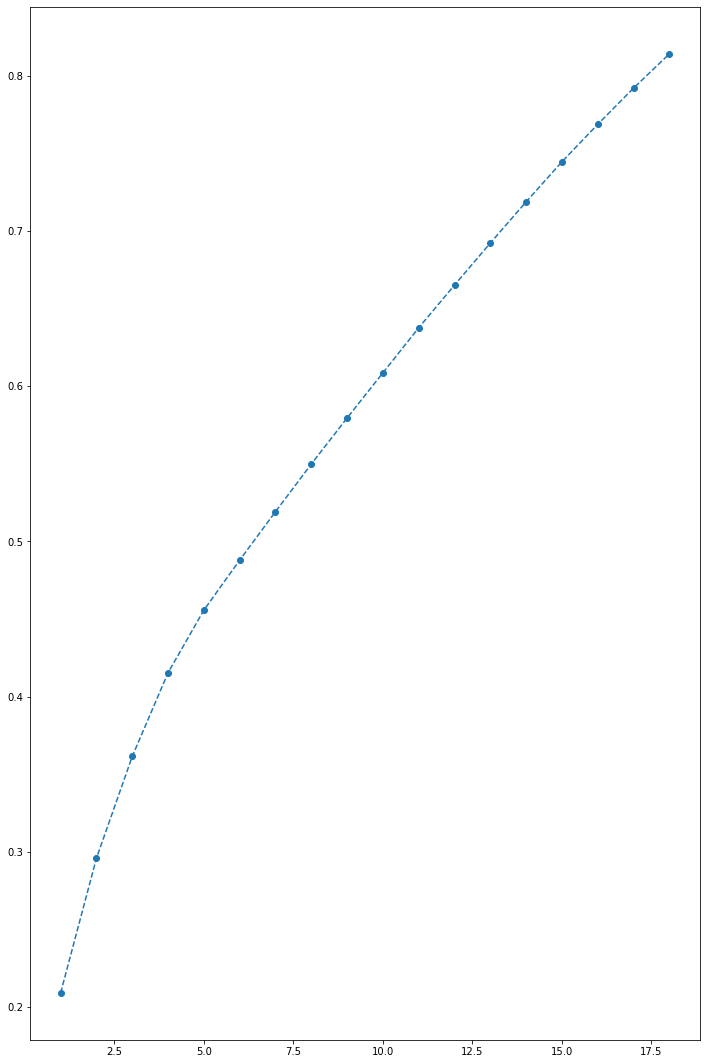

In [62]:
plt.figure(figsize = (12,19))

plt.plot(range(1,19), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

In [65]:
df_pca_c=pd.DataFrame(data=pca.components_, columns=df.columns.values)
df_pca_c

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-0.002872,-0.009977,0.098960,0.295955,-0.075017,0.230081,0.204900,0.189379,0.136770,-0.012287,...,0.130600,0.142586,-0.071808,0.015292,0.031403,0.044021,-0.010674,0.021124,-0.013093,0.321382
1,0.017575,0.164815,-0.030902,-0.016430,0.057036,-0.192843,-0.084434,-0.019425,-0.290857,-0.071218,...,-0.067597,0.041177,0.115904,-0.030290,0.015690,0.014914,0.026373,0.028909,-0.036343,-0.027752
2,0.004126,-0.166008,0.285557,-0.094614,0.151882,-0.330122,-0.263613,0.016743,0.271520,0.192097,...,0.053187,-0.007562,0.185941,-0.010221,0.146892,0.162654,0.047477,-0.005378,0.001658,0.049372
3,-0.004451,-0.308312,0.015757,0.004789,-0.076216,-0.078217,-0.065707,-0.035620,-0.289752,-0.058864,...,-0.121628,-0.028421,0.088778,0.043928,-0.032817,-0.054874,-0.015418,0.048208,-0.051643,-0.026332
4,0.055557,0.297026,-0.036359,-0.133964,-0.405095,0.047959,-0.144528,0.018300,0.154821,-0.077271,...,-0.042174,-0.133959,0.017122,-0.071778,-0.219719,0.021476,-0.002365,-0.071732,0.062129,-0.100696
5,-0.119537,-0.084571,0.038287,0.032311,0.277824,-0.046035,0.220461,-0.074661,-0.064993,0.061892,...,0.179015,-0.134455,0.130129,0.063037,-0.232188,-0.061134,0.110641,-0.516532,0.599806,0.043211
6,-0.172491,0.055576,0.142220,-0.058127,0.239647,0.021412,0.135559,-0.005031,0.054289,-0.005577,...,0.265172,-0.167413,-0.175171,0.317888,-0.300796,-0.143696,0.123885,0.273346,-0.085612,-0.010916
7,0.159043,0.069080,-0.069102,0.064354,0.152433,-0.010565,0.236047,-0.320918,0.006335,0.077215,...,0.134948,0.209746,0.175328,-0.090072,-0.277819,0.428256,0.012975,0.149495,-0.296383,0.005006
8,0.169379,-0.024716,0.133068,-0.106429,-0.112228,0.140543,0.020266,-0.197165,-0.209726,0.599013,...,0.176461,0.055583,-0.388927,-0.326612,0.258140,0.022988,0.095837,-0.026021,0.129683,-0.073521
9,0.031708,0.156821,-0.183249,0.056443,0.287820,-0.040968,0.176808,-0.065589,0.084056,-0.137443,...,-0.331684,0.204701,-0.204609,0.219133,0.457159,0.006007,0.440384,0.108719,0.148334,0.017730


<AxesSubplot:>

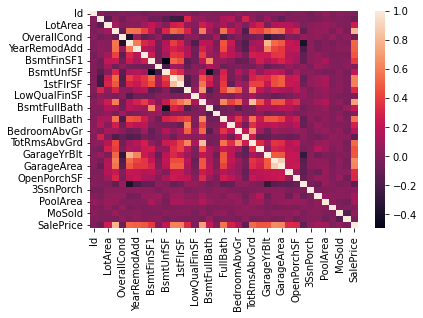

In [67]:
sns.heatmap(df.corr())

<AxesSubplot:>

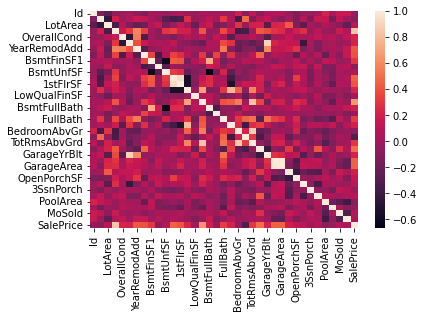

In [68]:
sns.heatmap(df_pca_c.corr())

# Ahora haremos en analisis de regresión

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

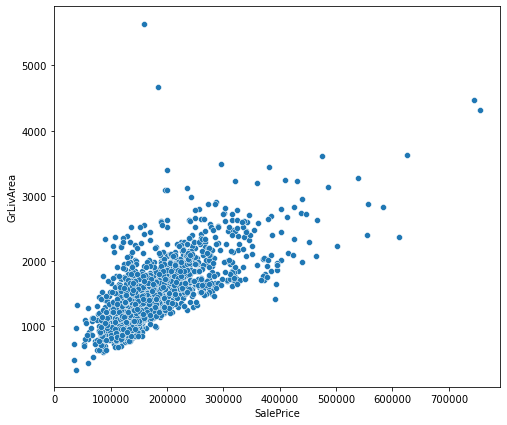

In [69]:
fig = plt.figure(figsize = (8,7))
sns.scatterplot(data=data_2, y=data_2.GrLivArea, x=data_2.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='GrLivArea'>

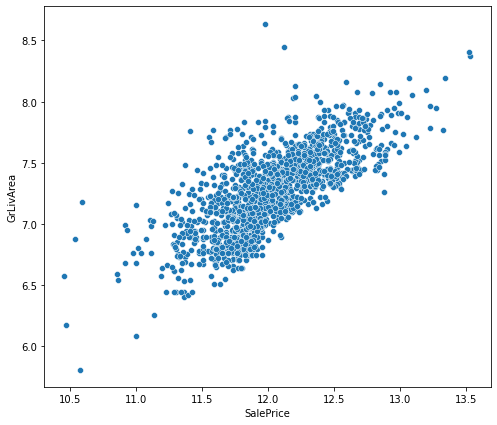

In [73]:
fig = plt.figure(figsize = (8,7))
sns.scatterplot(data=data_2, y=np.log(data_2.GrLivArea), x=np.log(data_2.SalePrice))

In [76]:
x = sm.add_constant(data_2.GrLivArea)
y = data_2.SalePrice

modelo = sm.OLS(y,x).fit()
predicciones = modelo.predict(x)
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          4.52e-223
Time:                        21:11:19   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0

C:\Users\MICH\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [77]:
x = sm.add_constant(np.log(data_2.GrLivArea))
y = np.log(data_2.SalePrice)

modelo = sm.OLS(y,x).fit()
predicciones = modelo.predict(x)
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     1666.
Date:                Thu, 10 Feb 2022   Prob (F-statistic):          1.60e-243
Time:                        21:12:44   Log-Likelihood:                -175.10
No. Observations:                1460   AIC:                             354.2
Df Residuals:                    1458   BIC:                             364.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6681      0.156     36.360      0.0

C:\Users\MICH\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [78]:
prediccion = modelo.predict(x)

In [79]:
x['prediccion'] = prediccion

In [80]:
x

,const,GrLivArea,prediccion
0,1.0,7.444249,12.178384
1,1.0,7.140453,11.912704
2,1.0,7.487734,12.216413
3,1.0,7.448334,12.181957
4,1.0,7.695303,12.397940
...,...,...,...
1455,1.0,7.406711,12.145556
1456,1.0,7.636752,12.346735
1457,1.0,7.757906,12.452689
1458,1.0,6.982863,11.774886


Dados los resultados no podemos asegurar que el área sea un buen estimador del precio de venta.